In [18]:
import akshare as ak
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import talib
import numpy as np
from matplotlib.font_manager import FontProperties
import os
%matplotlib inline
# 添加字体
# matplotlib.rcParams['axes.unicode_minus']=False # 如果不加入下面这一句，会导致负号无法显示
# plt.rcParams["font.sans-serif"] = ["SimHei"]

# 思路

参考这个[定投视频](https://www.bilibili.com/video/BV1TA411x77e)，把握大盘的下跌，越跌越投，

需要一下参数：
- 基准：上证指数、上证50、沪深300、中证500、中证1000
- 投资标的：指数ETF、各类股票基金 880
- 加建仓比例

# 获得上证指数
指数代码：https://q.stock.sohu.com/cn/zs.shtml

- SH000001: 上证指数
- SH000300: 沪深300
- SH000016：上证50
- SH000905：中证500
- SH000906：中证800
- SH000852：中证1000

In [21]:
index_code = "sh000905"
index_file = f"{index_code}.csv"
df_stock_index = ak.stock_zh_index_daily(symbol=index_code)
print(df_stock_index)

            date      open      high       low     close       volume
0     2005-01-04   996.682   996.682   984.795   986.927    232376203
1     2005-01-05   986.570  1008.855   985.677  1003.633    348610113
2     2005-01-06  1003.490  1003.490   990.792   994.595    293390559
3     2005-01-07   993.434  1009.000   990.446   997.606    339162698
4     2005-01-10   996.928  1006.457   993.123  1006.337    294940533
...          ...       ...       ...       ...       ...          ...
4341  2022-11-16  6238.584  6263.156  6190.012  6203.917  12977037600
4342  2022-11-17  6182.691  6217.205  6148.615  6217.205  12343019600
4343  2022-11-18  6213.091  6251.107  6181.554  6191.648  13118109300
4344  2022-11-21  6147.717  6196.647  6116.296  6189.709  11285438700
4345  2022-11-22  6178.163  6196.196  6100.113  6125.400  11608602400

[4346 rows x 6 columns]


      Unnamed: 0       date      open      high       low     close  \
0              0 2005-01-04   996.682   996.682   984.795   986.927   
1              1 2005-01-05   986.570  1008.855   985.677  1003.633   
2              2 2005-01-06  1003.490  1003.490   990.792   994.595   
3              3 2005-01-07   993.434  1009.000   990.446   997.606   
4              4 2005-01-10   996.928  1006.457   993.123  1006.337   
...          ...        ...       ...       ...       ...       ...   
4339        4339 2022-11-14  6140.188  6189.383  6104.930  6129.513   
4340        4340 2022-11-15  6125.107  6236.384  6112.619  6236.384   
4341        4341 2022-11-16  6238.584  6263.156  6190.012  6203.917   
4342        4342 2022-11-17  6182.691  6217.205  6148.615  6217.205   
4343        4343 2022-11-18  6213.091  6251.107  6181.554  6191.648   

           volume  
0       232376203  
1       348610113  
2       293390559  
3       339162698  
4       294940533  
...           ...  
4339  1

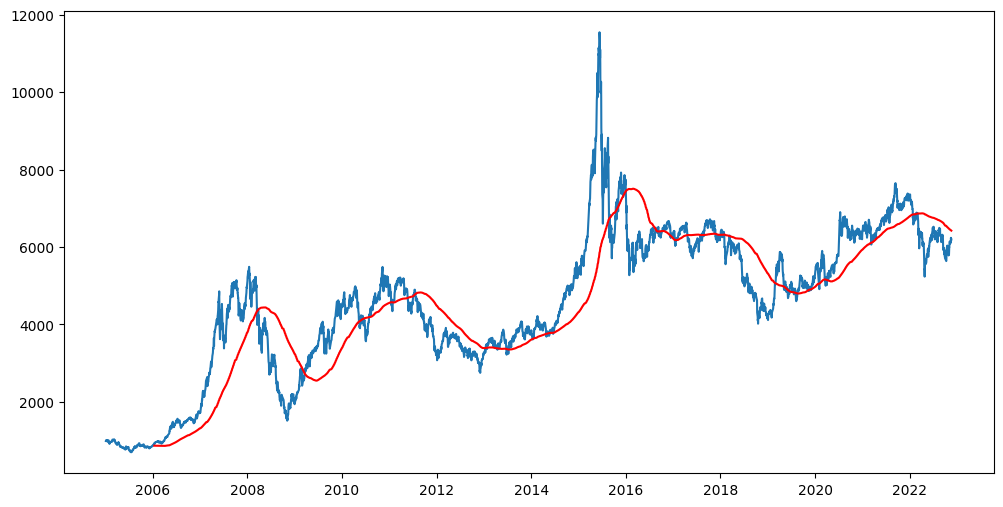

In [20]:
# 上证指数: 
# https://www.akshare.xyz/data/index/index.html#id1

index_code = "sh000905"
index_file = f"{index_code}.csv"
if not os.path.exists(index_file):
    df_stock_index = ak.stock_zh_index_daily(symbol=index_code)
    df_stock_index.to_csv(index_file)
else:
    df_stock_index = pd.read_csv(index_file)
    df_stock_index['date'] = pd.to_datetime(df_stock_index['date'], format='%Y-%m-%d')
print(df_stock_index)


df_stock_index['ma'] = talib.SMA(df_stock_index.close, timeperiod=250)

plt.figure(figsize=(12,6))
plt.plot(df_stock_index.date,df_stock_index.close)
plt.plot(df_stock_index.date,df_stock_index.ma,color='r')

# 获得某只基金的累计净值

开放式基金-历史数据
接口: fund_open_fund_info_em
https://akshare.akfamily.xyz/data/fund/fund_public.html#id6

      Unnamed: 0       净值日期   累计净值
0              0 2015-01-30  1.000
1              1 2015-02-06  0.993
2              2 2015-02-13  1.015
3              3 2015-02-17  1.019
4              4 2015-02-27  1.019
...          ...        ...    ...
1880        1880 2022-11-14  2.482
1881        1881 2022-11-15  2.524
1882        1882 2022-11-16  2.479
1883        1883 2022-11-17  2.515
1884        1884 2022-11-18  2.538

[1885 rows x 3 columns]


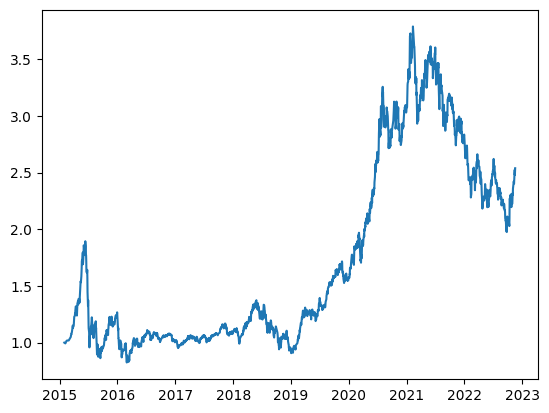

In [7]:
fund_code = "000960"

fund_file = f"{fund_code}.csv"

if not os.path.exists(f"{fund_code}.csv"):
    df_fund = ak.fund_open_fund_info_em(fund=fund_code, indicator="累计净值走势")
    df_fund.to_csv(fund_file)
else:
    df_fund = pd.read_csv(fund_file)
    df_fund['净值日期'] = pd.to_datetime(df_fund['净值日期'], format='%Y-%m-%d')


print(df_fund)
plt.plot(df_fund['净值日期'],df_fund['累计净值'])